<a href="https://colab.research.google.com/github/sirivellamadhu/mnist_experiments/blob/master/modify_pixel_values_and_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My\ Drive/mnist_experiments


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/mnist_experiments


In [0]:
import tensorflow  as tf
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


(x_train, y_train) ,(x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [0]:
x_two = np.array([ [ [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  12,   0,   6, 206, 253, 140,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,  77, 251, 210,  25,   0,   0,   0, 122, 248, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,  31,  18,   0,   0,   0,   0, 209, 253, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 117, 247, 253, 198,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  76, 247, 253, 231,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 253, 253, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 176, 246, 253, 159,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 234, 253, 233,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 248, 253, 189,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,  19, 200, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0, 134, 253, 253, 173,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  43,  20,  20,  20,  20,   5,   0,   5,  20,  20,  37, 150, 150, 150, 147,  10,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253, 253, 253, 253, 253, 253, 168, 143, 166, 253, 253, 253, 253, 253, 253, 253, 123,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0, 174, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 249, 247, 247, 169, 117, 117,  57,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 123, 123, 123, 166, 253, 253, 253, 155, 123, 123,  41,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],



 [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 169, 253, 253, 253, 213, 142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,  52, 250, 253, 210,  32,  12,   0,   6, 206, 253, 140,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,  77, 251, 210,  25,   0,   0,   0, 122, 248, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,  31,  18,   0,   0,   0,   0, 209, 253, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0, 117, 247, 253, 198,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,  76, 247, 253, 231,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0, 128, 253, 253, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0, 176, 246, 253, 159,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,  25, 234, 253, 233,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0, 198, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,  78, 248, 253, 189,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,  19, 200, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 134, 253, 253, 173,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 248, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 248, 253, 253,  43,  20,  20,  20,  20,   5,   0,   5,  20,  20,  37, 150, 150, 150, 147,  10,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 248, 253, 253, 253, 253, 253, 253, 253, 168, 143, 166, 253, 253, 253, 253, 253, 253, 253, 123,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 174, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 249, 247, 247, 169, 117, 117,  57,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0, 118, 123, 123, 123, 166, 253, 253, 253, 155, 123, 123,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],



 [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 169, 253, 253, 253, 213, 142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,  52, 250, 253, 210,  32,  12,   0,   6, 206, 253, 140,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,  77, 251, 210,  25,   0,   0,   0, 122, 248, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,  31,  18,   0,   0,   0,   0, 209, 253, 253,  65,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0, 117, 247, 253, 198,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,  76, 247, 253, 231,  63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0, 128, 253, 253, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0, 176, 246, 253, 159,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,  25, 234, 253, 233,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0, 198, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,  78, 248, 253, 189,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,  19, 200, 253, 253, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 134, 253, 253, 173,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 248, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 248, 253, 253,  43,  20,  20,  20,  20,   5,   0,   5,  20,  20,  37, 150, 150, 150, 147,  10,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 248, 253, 253, 253, 253, 253, 253, 253, 168, 143, 166, 253, 253, 253, 253, 253, 253, 253, 123,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0, 174, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253, 249, 247, 247, 169, 117, 117,  57,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0, 118, 123, 123, 123, 166, 253, 253, 253, 155, 123, 123,  41,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],



 [[   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0, 169, 253, 253, 253, 213, 142, 176, 253, 253, 122,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  52, 250, 253, 210,  32,  12,   0,   6, 206, 253, 140,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  77, 251, 210,  25,   0,   0,   0, 122, 248, 253,  65,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,  31,  18,   0,   0,   0,   0, 209, 253, 253,  65,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0, 117, 247, 253, 198,  10,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,  76, 247, 253, 231,  63,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0, 128, 253, 253, 144,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0, 176, 246, 253, 159,  12,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,  25, 234, 253, 233,  35,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0, 198, 253, 253, 141,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,  78, 248, 253, 189,  12,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,  19, 200, 253, 253, 141,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0, 134, 253, 253, 173,  12,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0, 248, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0, 248, 253, 253,  43,  20,  20,  20,  20,   5,   0,   5,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0, 248, 253, 253, 253, 253, 253, 253, 253, 168, 143, 166,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0, 174, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0, 118, 123, 123, 123, 166, 253, 253, 253, 155, 123,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],

   [[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171, 255, 255, 150,  93,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 253, 253, 253, 218,  30,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213, 142, 176, 253, 253, 122,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  52, 250, 253, 210,  32,  12,   0,   6, 206, 253, 140,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  77, 251, 210,  25,   0,   0,   0, 122, 248, 253,  65,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31,  18,   0,   0,   0,   0, 209, 253, 253,  65,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 117, 247, 253, 198,  10,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  76, 247, 253, 231,  63,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 128, 253, 253, 144,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 176, 246, 253, 159,  12,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  25, 234, 253, 233,  35,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 198, 253, 253, 141,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  78, 248, 253, 189,  12,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19, 200, 253, 253, 141,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 134, 253, 253, 173,  12,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  25,   0,   0,   0,   0,   0,   0,   0],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253,  43,  20,  20,  20,  20,   5,   0,   5],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 248, 253, 253, 253, 253, 253, 253, 253, 168, 143, 166],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 174, 253, 253, 253, 253, 253, 253, 253, 253, 253, 253],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 118, 123, 123, 123, 166, 253, 253, 253, 155, 123],
  [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]]])

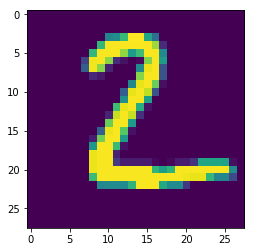

In [88]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_two[0])

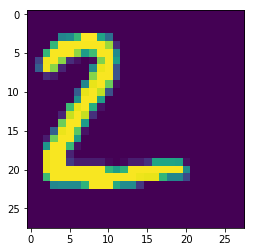

In [89]:
plt.imshow(x_two[1])

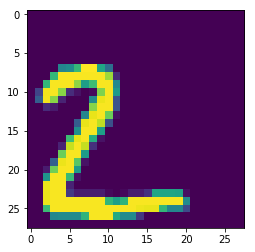

In [90]:
plt.imshow(x_two[2])

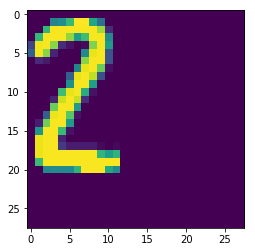

In [91]:
plt.imshow(x_two[3])

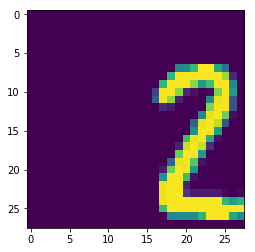

In [92]:
plt.imshow(x_two[4])

In [0]:
from keras.models import load_model
model = load_model('mnist.h5')

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_two = x_two.reshape(x_two.shape[0], 28, 28, 1)


input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_two = x_two.astype('float32')
x_train /= 255
x_test /= 255
x_two /= 255

In [77]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 2s 216us/step


[0.0633316287794285, 0.9851]

In [78]:
type(x_two)

numpy.ndarray

In [0]:
img_rows, img_cols = 28,28
pred0 = model.predict(x_two[0].reshape(1, img_rows, img_cols, 1))
pred1 = model.predict(x_two[1].reshape(1, img_rows, img_cols, 1))
pred2 = model.predict(x_two[2].reshape(1, img_rows, img_cols, 1))
pred3 = model.predict(x_two[3].reshape(1, img_rows, img_cols, 1))
pred4 = model.predict(x_two[4].reshape(1, img_rows, img_cols, 1))

In [80]:
print(pred0.argmax())
print(pred1.argmax())
print(pred2.argmax())
print(pred3.argmax())
print(pred4.argmax())

2
1
7
5
7


Modifing the pixel values imapacts a lot in this network..